# Import Modules

In [1]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import datetime as dt
from PIL import Image
from credentials import *
from Queries.devices_queries import *
sys.path.append(project_path)
from urllib.request import urlopen
from ClassLibify.main import DataExtractor

# Options and Settings

In [2]:
%matplotlib inline
warnings.simplefilter("ignore")    
pd.set_option("expand_frame_repr", True)
np.set_printoptions(precision=4, suppress=True)

# Load Image

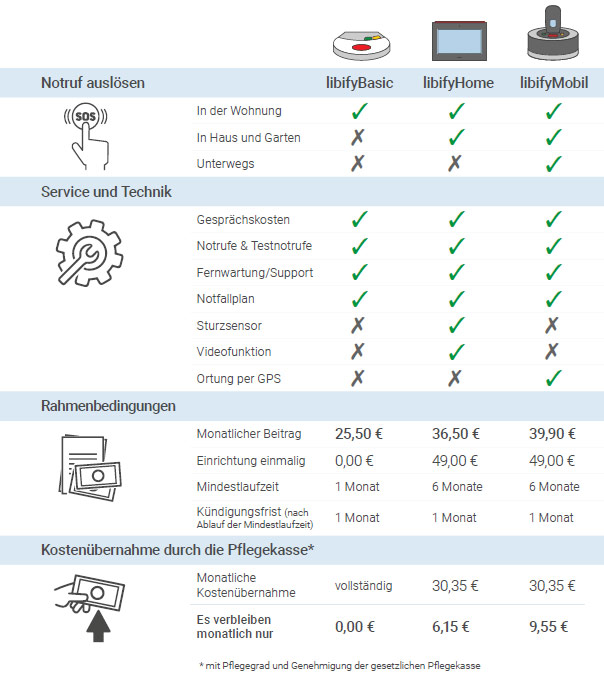

In [3]:
image_url = "https://somedi.eu/files/00-somedi/somedi_plus/hausnotruf/housenotruf-uebeblick.jpg"
Image.open(fp=urlopen(f"{image_url}"))

# Fetch Data

Extract Customers and Their Respective Devices

In [4]:
df_customers = DataExtractor().get_data_repo_db(query1)
df_customers.head()

device_types serial_numbers ist_dupliziert  customer_id  \
0          AC1     AC1-003098           Nein      2152836   
1          AC3     AC3-014307           Nein      2302580   
2          AC3     AC3-015943           Nein      2108293   
3          AC3     AC3-018506           Nein      2300783   
4          AC3     AC3-022625           Nein      2014365   

          customer_name  subscription_id  start_date end_date  \
0  Markus-Jürgen Müller          1402457  2021-02-18     None   
1         Gertrud Stief          1622438  2023-05-10     None   
2          Jürgen Unger          1355685  2020-03-17     None   
3         Ingrid Hüsing          1617815  2023-04-17     None   
4      Ursula Dworaczek          1273117  2019-05-24     None   

  subscription_status product  progress    device_name proprietor_name  \
0              active   Mobil       100  Active Cradle            None   
1              active   Mobil       100  Active Cradle            None   
2              active   Mobil       100  Active Cradle            None   
3              active   Mobil       100  Active Cradle           Arkea   
4              active   Mobil       100  Active Cradle           Arkea   

  device_created_date  
0          2017-03-06  
1          2018-03-02  
2          2018-05-17  
3          2018-08-22  
4          2019-06-05

Extract Backend Devices And Their Status

In [5]:
df_backend = DataExtractor().get_data_repo_db(query2)
df_backend.head()

geräte_id gerätetyp serial_number gerätename  \
0  00022924-3a0f-4899-b9c3-bea6c681427c        LS   LS200101927     Tablet   
1  0005f02d-f533-4eea-8803-9d8f3d1c562c       GC3    GC3-018431       GeoX   
2  0006c27e-672f-4b18-aff7-13f3d03bb78b       GC5    GC5-037067       GeoX   
3  0008fc74-554a-46eb-8bb0-71d55c04fb1f       GC2    GC2-002113       GeoX   
4  00093f50-cdd0-4ffd-b2a9-18ffef50ac53       GC2    GC2-003894       GeoX   

  inhaber gerätezustand verkaufsdatum verkaufsstatus servicedatum  \
0   Arkea      Neugerät    2021-10-28     b2c_rental   2021-10-28   
1    None      Neugerät          None           None         None   
2    None      Neugerät    2021-10-20      b2b_sales   2021-10-20   
3    None      Neugerät          None           None         None   
4    None      Neugerät          None           None         None   

  servicestatus betriebszustand gerät_erstellt_datum  
0  delivery_out     Beim Kunden           2020-05-15  
1          None            None           2013-04-08  
2  delivery_out     Beim Kunden           2018-10-24  
3          None            None           2012-12-13  
4          None            None           2014-10-24

# Write Output

In [6]:
with pd.ExcelWriter(os.path.join(task_output, "Geräte.xlsx"), engine="openpyxl") as writer:
  df_customers.to_excel(writer, sheet_name="Kundengeräte Info", index=False)
  df_backend.to_excel(writer, sheet_name="Backend Geräte Info", index=False)